# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv('Bank customer churn data.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Checking Null values

In [3]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [4]:
data = df.drop(['customer_id'], axis=1)

# Data Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.country = le.fit_transform(data.country)
data.gender = le.fit_transform(data.gender)

In [6]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


# Feature Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
d = scaler.fit_transform(data)
columns = data.columns
data = pd.DataFrame(d, columns=columns)
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0
9996,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0
9997,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0
9998,0.844,0.5,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0


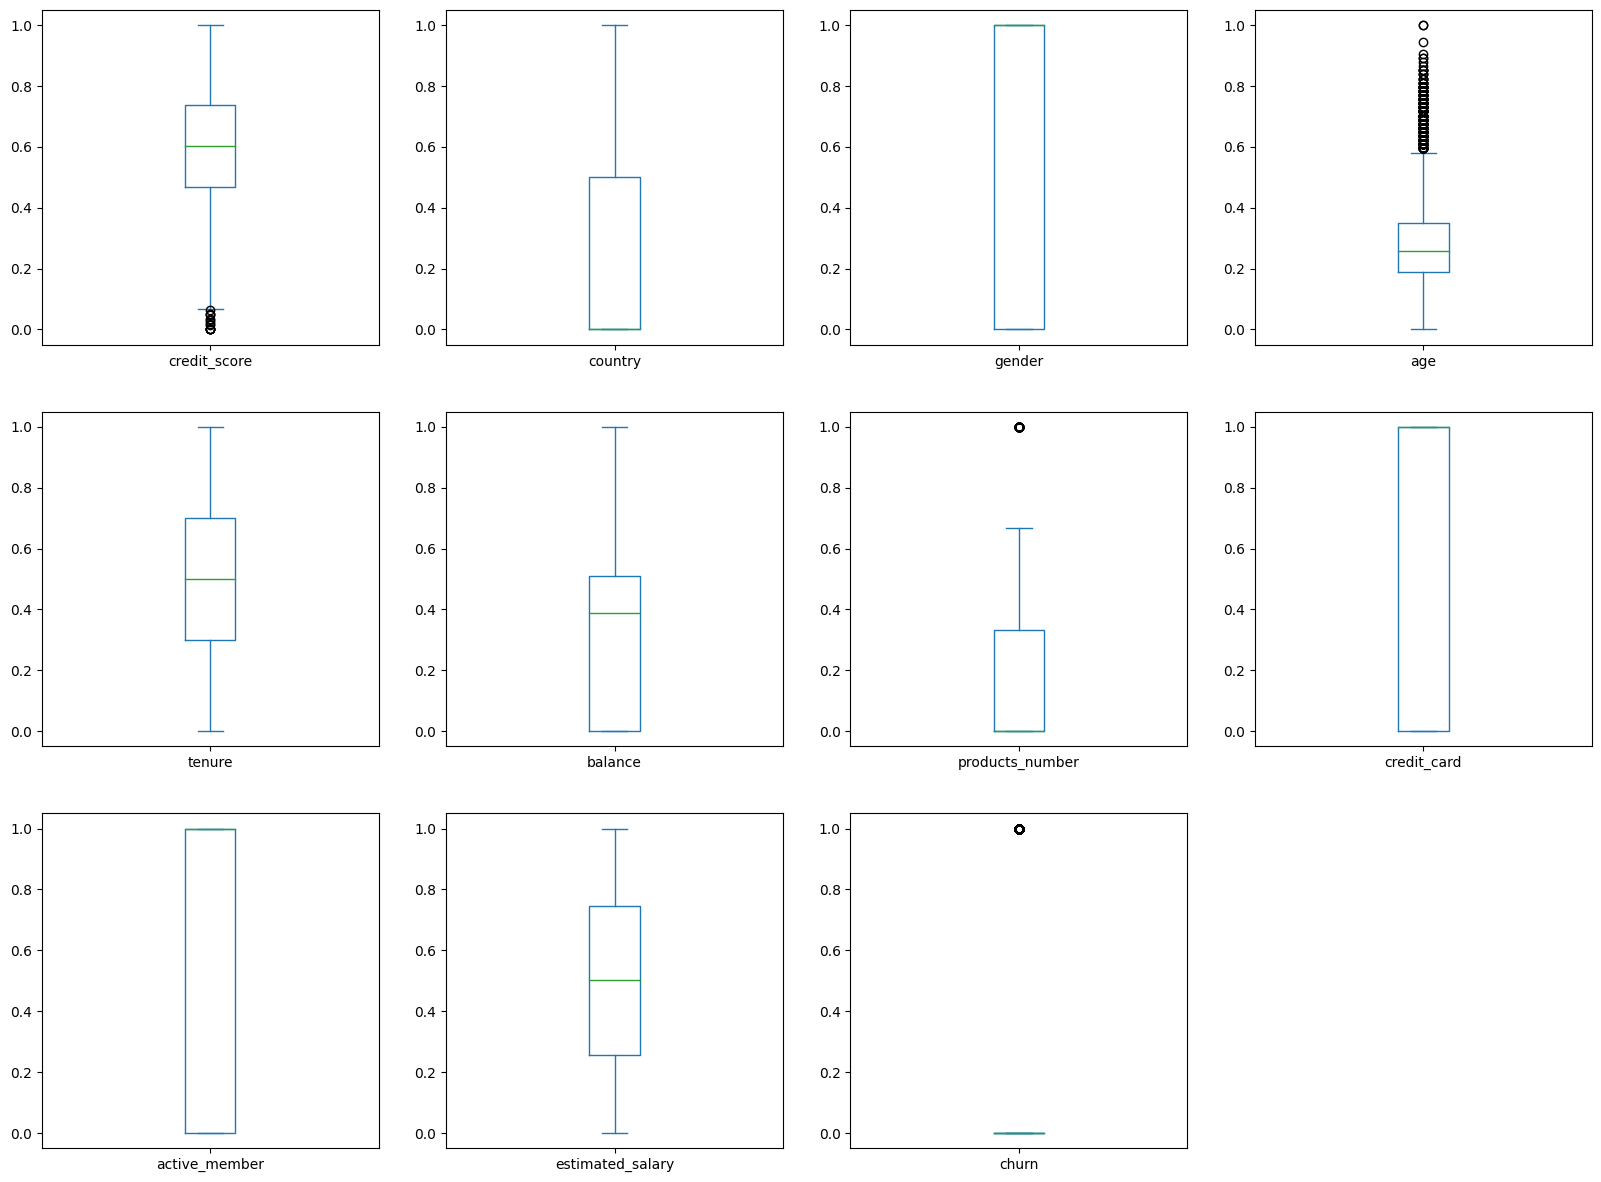

In [8]:
data.plot(kind= 'box', subplots=True, layout=(4,4), figsize=(20,20))
plt.show()

In [9]:
data.corr()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
country,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [10]:
correlation = data.corr()
mask = (data.corr()> 0.3)& (data.corr()<1.0)
high_corr = correlation[mask]
high_corr

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
products_number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_member,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estimated_salary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.describe()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.373150,0.545700,0.282727,0.501280,0.304848,0.176733,0.70550,0.515100,0.500441,0.203700
std,0.193307,0.413765,0.497932,0.141727,0.289217,0.248696,0.193885,0.45584,0.499797,0.287580,0.402769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.468000,0.000000,0.000000,0.189189,0.300000,0.000000,0.000000,0.00000,0.000000,0.254977,0.000000
50%,0.604000,0.000000,1.000000,0.256757,0.500000,0.387402,0.000000,1.00000,1.000000,0.500960,0.000000
75%,0.736000,0.500000,1.000000,0.351351,0.700000,0.508749,0.333333,1.00000,1.000000,0.746955,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


The PPS is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns. The score ranges from 0 (no predictive power) to 1 (perfect predictive power). It can be used as an alternative to the correlation (matrix).

In [12]:
import ppscore as pps
pps.score(data, "credit_score", "churn")

{'x': 'credit_score',
 'y': 'churn',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.1978,
 'model_score': 0.31316347686882184,
 'model': DecisionTreeRegressor()}

In [13]:
pps_score = pps.matrix(data)
pps_score

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,credit_score,credit_score,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,credit_score,country,0.000000,regression,True,mean absolute error,0.372700,0.383958,DecisionTreeRegressor()
2,credit_score,gender,0.000000,regression,True,mean absolute error,0.458400,0.495356,DecisionTreeRegressor()
3,credit_score,age,0.000000,regression,True,mean absolute error,0.103214,0.112585,DecisionTreeRegressor()
4,credit_score,tenure,0.000000,regression,True,mean absolute error,0.249640,0.265204,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
116,churn,products_number,0.000000,regression,True,mean absolute error,0.175333,0.177063,DecisionTreeRegressor()
117,churn,credit_card,0.000000,regression,True,mean absolute error,0.292000,0.413384,DecisionTreeRegressor()
118,churn,active_member,0.010634,regression,True,mean absolute error,0.492800,0.487560,DecisionTreeRegressor()
119,churn,estimated_salary,0.000000,regression,True,mean absolute error,0.246671,0.246706,DecisionTreeRegressor()


In [14]:
pps_score[pps_score['ppscore']>0.75]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,credit_score,credit_score,1.0,predict_itself,True,None,0.0,1.0,None
12,country,country,1.0,predict_itself,True,None,0.0,1.0,None
24,gender,gender,1.0,predict_itself,True,None,0.0,1.0,None
36,age,age,1.0,predict_itself,True,None,0.0,1.0,None
48,tenure,tenure,1.0,predict_itself,True,None,0.0,1.0,None
60,balance,balance,1.0,predict_itself,True,None,0.0,1.0,None
72,products_number,products_number,1.0,predict_itself,True,None,0.0,1.0,None
84,credit_card,credit_card,1.0,predict_itself,True,None,0.0,1.0,None
96,active_member,active_member,1.0,predict_itself,True,None,0.0,1.0,None
108,estimated_salary,estimated_salary,1.0,predict_itself,True,None,0.0,1.0,None


In [15]:
#Detecting outliers using Isolation Forest
from sklearn.ensemble import IsolationForest
clf= IsolationForest(random_state=0,contamination=0.1)
clf.fit(data)

C:\Users\Swaroop Honrao\PycharmProjects\Bank Churn Analysis\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=0)

In [16]:
data['anomaly']=clf.predict(data.iloc[:,:])

In [17]:
data[data['churn']==0]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,anomaly
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1
6,0.944,0.0,1.0,0.432432,0.7,0.000000,0.333333,1.0,1.0,0.050261,0.0,1
8,0.302,0.0,1.0,0.351351,0.4,0.566170,0.333333,0.0,1.0,0.374680,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.588,0.0,1.0,0.135135,0.7,0.618021,0.000000,1.0,0.0,0.145854,0.0,1
9994,0.900,0.0,0.0,0.148649,0.2,0.000000,0.333333,0.0,0.0,0.838890,0.0,1
9995,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0,1
9996,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0,1


In [18]:
data[data["anomaly"]==-1] #1000 rows are outliers 

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,anomaly
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,-1
7,0.052,0.5,0.0,0.148649,0.4,0.458540,1.000000,1.0,0.0,0.596733,1.0,-1
30,0.482,1.0,0.0,0.283784,0.3,0.000000,0.666667,1.0,0.0,0.702356,1.0,-1
41,0.230,0.0,0.0,0.445946,0.8,0.488335,0.000000,0.0,0.0,0.906517,1.0,-1
43,0.968,0.0,0.0,0.418919,0.2,0.523697,0.000000,0.0,0.0,0.971864,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
9930,0.150,0.5,1.0,0.297297,0.9,0.664718,0.333333,0.0,1.0,0.863259,0.0,-1
9936,0.518,0.0,1.0,0.797297,0.1,0.000000,0.000000,0.0,1.0,0.093495,0.0,-1
9962,0.704,1.0,1.0,0.351351,0.9,0.000000,0.000000,0.0,0.0,0.296007,1.0,-1
9979,0.654,0.0,0.0,0.540541,0.1,0.358802,0.000000,0.0,1.0,0.014885,0.0,-1


In [19]:
data.shape

(10000, 12)

In [20]:
#dropping 4521 records at contamination of 10% assumption
data.drop(data[data['anomaly']==-1].index, inplace=True)
data.shape

(9000, 12)

In [21]:
data['churn'].value_counts()

0.0    7728
1.0    1272
Name: churn, dtype: int64

<Axes: xlabel='churn', ylabel='Count'>

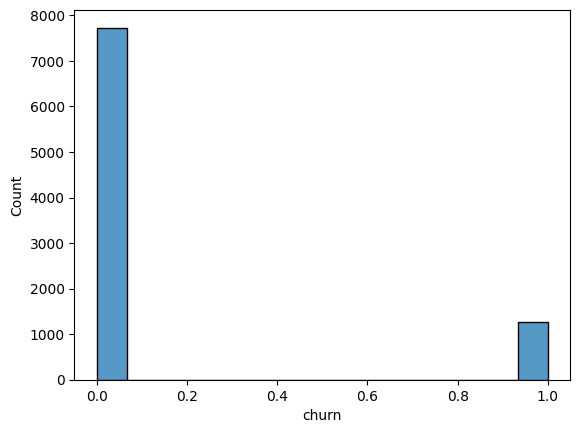

In [22]:
import seaborn as sns
sns.histplot(data['churn']) #here we can see that our data is Unbalanced data in which 0= 88.3%  &  1= 11.69%

In [24]:
data.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'anomaly'],
      dtype='object')

In [25]:
data = data.drop(['anomaly'], axis=1)

In [26]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0
5,0.590,1.0,1.0,0.351351,0.8,0.453394,0.333333,1.0,0.0,0.748797,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9994,0.900,0.0,0.0,0.148649,0.2,0.000000,0.333333,0.0,0.0,0.838890,0.0
9995,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0
9996,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0
9998,0.844,0.5,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0


# Taking Care of Imbalance data

In [27]:
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

In [29]:
y.head()

0    1.0
1    0.0
3    0.0
4    0.0
5    1.0
Name: churn, dtype: float64

In [30]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

We can use the Counter object to summarize the number of examples in each class to confirm the dataset was created correctly.

In [31]:
from collections import Counter
from numpy import where

In [33]:
counter = Counter(y)
print(counter)

Counter({0.0: 7728, 1.0: 1272})


In [34]:
over=SMOTE(sampling_strategy=0.6)
under=RandomUnderSampler(sampling_strategy=1.0)

In [35]:
steps=[('o',over),('u',under)]
pipeline=Pipeline(steps=steps)

In [36]:
#Transform the Dataset by oversampling minority Class and Under-sampling Majority Class
X,y=pipeline.fit_resample(X,y)
#Summarize new Class Distribution
counter=Counter(y)
print(counter)

Counter({0.0: 4636, 1.0: 4636})


<Axes: xlabel='churn', ylabel='Count'>

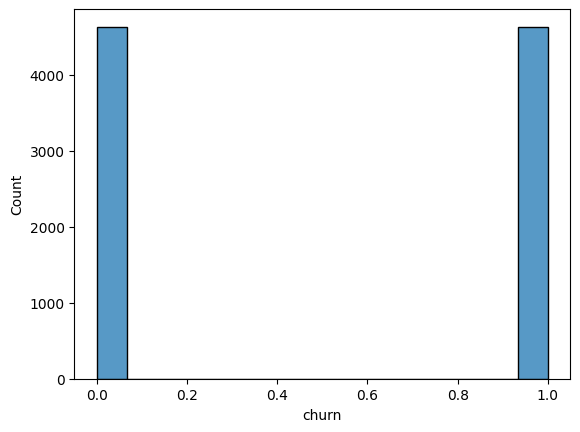

In [38]:
import seaborn as sns
sns.histplot(y)

# Splitting dataset into training and test set

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3, random_state=50)

In [40]:
X_train.shape, X_test.shape

((2781, 10), (6491, 10))

# Logisitic Regression Model

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = lr.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred) 
print(cm)
print("Accuracy Score", accuracy_score(y_test, y_pred))

[[2360  889]
 [ 869 2373]]
Accuracy Score 0.7291634570944384


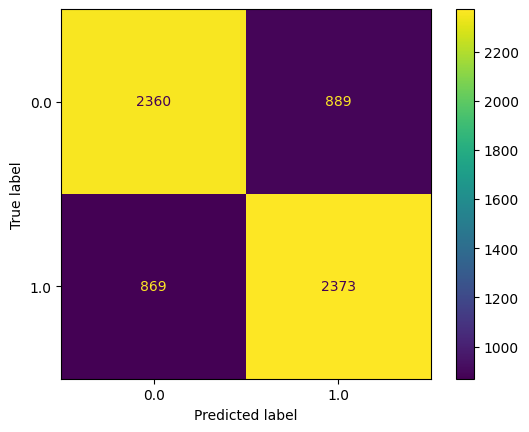

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(cm,display_labels=lr.classes_)
disp.plot()
plt.show()

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73      3249
         1.0       0.73      0.73      0.73      3242

    accuracy                           0.73      6491
   macro avg       0.73      0.73      0.73      6491
weighted avg       0.73      0.73      0.73      6491



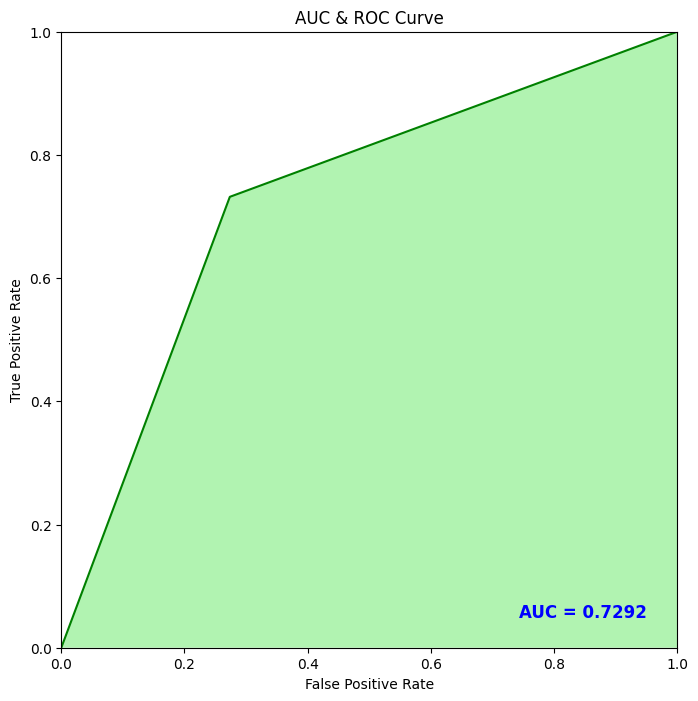

In [50]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Cross validation

In [52]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state= 0)
n_scores = cross_val_score(lr, X,y, scoring='accuracy', cv=cv, n_jobs=-1)

In [53]:
from numpy import mean
from numpy import std
Mean_Accuracy_lr=mean(n_scores)*100
Mean_Accuracy_lr

73.52228483924165

In [54]:
from sklearn.metrics import log_loss
log_loss1=log_loss(y_test,y_pred)
log_loss1

9.761938477594816

# XgBoost Model

In [55]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [56]:
y_pred = xg.predict(X_test)

In [57]:
cm=confusion_matrix(y_test,y_pred) 
print(cm)
print("Accuracy Score", accuracy_score(y_test, y_pred))

[[2875  374]
 [ 439 2803]]
Accuracy Score 0.8747496533661994


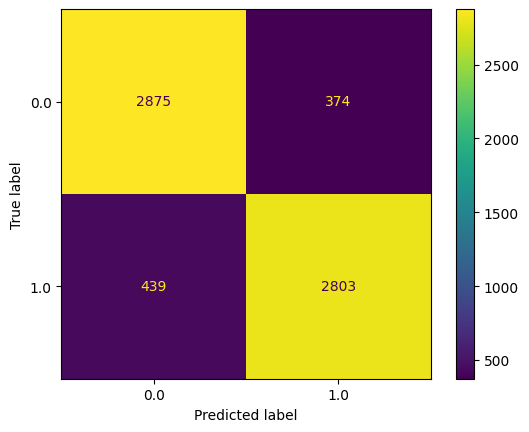

In [58]:
disp=ConfusionMatrixDisplay(cm,display_labels=lr.classes_)
disp.plot()
plt.show()

In [65]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      3249
         1.0       0.86      0.85      0.86      3242

    accuracy                           0.86      6491
   macro avg       0.86      0.86      0.86      6491
weighted avg       0.86      0.86      0.86      6491



In [61]:
xg.save_model('xgb_model.h5')

# Random Forest Classifier Model

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_features=3)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_features=3, n_estimators=50)

In [63]:
y_pred = rf.predict(X_test)

In [64]:
cm=confusion_matrix(y_test,y_pred) 
print(cm)
print("Accuracy Score", accuracy_score(y_test, y_pred))

[[2795  454]
 [ 478 2764]]
Accuracy Score 0.8564165767986442


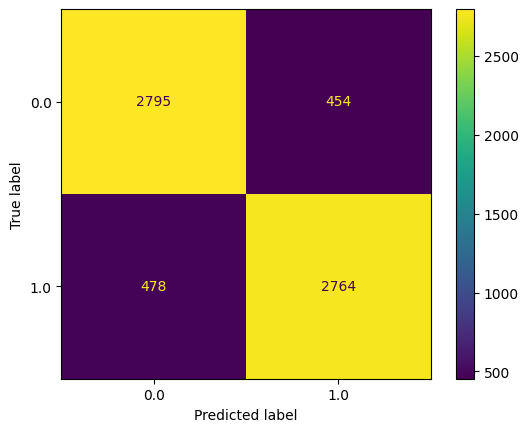

In [66]:
disp=ConfusionMatrixDisplay(cm,display_labels=lr.classes_)
disp.plot()
plt.show()

In [67]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      3249
         1.0       0.86      0.85      0.86      3242

    accuracy                           0.86      6491
   macro avg       0.86      0.86      0.86      6491
weighted avg       0.86      0.86      0.86      6491

